In [417]:
import processing
import pandas as pd
import string 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.cross_validation import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from textstat.textstat import textstat
from nltk.wsd import lesk

from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [23]:

names_and_win = [('campus_assault.txt', [0, 1], [(0, 1), (1, 0)]), ('samesex.txt', [0, 1], [(0, 0), (0, 0)]), ('iran_deal.txt', [0, 1], [(0, 0), (0, 0)]),\
('death_penalty.txt', [0, 1], [(1, 0), (0, 0)]), ('constitutional_authority.txt', [0, 1], [(0, 1), (0, 0)]), ('right_to_forget.txt', [0, 1], [(0, 0), (0, 0)]), \
('liberals_stifling.txt', [1, 0], [(0, 1), (0, 0)]), ('declinists.txt', [1, 0], [(0, 0), (1, 0)]), ('amazon.txt', [0, 1], [(0, 0), (0, 0)]), ('gmos.txt', [1, 0], [(0, 1), (0, 1)]), \
('eutha.txt', [0, 1], [(0, 0), (1, 0)]), \
('income_inequal.txt', [0, 1], [(1, 0), (0, 0)]), ('mass_collection.txt', [1, 0], [(0, 1), (0, 0)]), ('flexing_musc.txt', [1, 0], [(0, 0), (0, 0)]), ('common_core.txt', [1, 0], [(1, 0), (1, 0)]), \
('pacs.txt', [0, 1], [(0, 1), (0, 1)]), ('death_not_final.txt', [0, 1], [(0, 0), (0, 0)]), ('millenials.txt', [1, 0], [(1, 0), (0, 1)]), ('lecture_obsolete.txt', [1, 0], [(0, 0), (0, 1)]), \
('russia.txt', [0, 1], [(0, 0), (0, 0)]), ('USA_kill.txt', [1, 0], [(0, 0), (0, 1)]), ('affirmative.txt', [1, 0], [(1, 0), (0, 0)]), ('snowden.txt', [1, 0], [(0, 0), (0, 0)]), ('obamacare.txt', [1, 0], [(0, 1), (0, 0)]), \
('eat_face.txt', [1, 0], [(0, 0), (0, 0)]), ('spy_on_me.txt', [0, 1], [(0, 0), (0, 0)]), ('right_to_bear.txt', [1, 0], [(0, 0), (0, 0)]), ('take_job_anywhere.txt', [0, 1], [(0, 0), (1, 0)]), \
('red_state.txt', [1, 0], [(0, 0), (0, 0)]), ('break_up_banks.txt', [0, 1], [(0, 0), (0, 0)]), ('drones.txt', [0, 1], [(0, 0), (0, 0)]), ('us_syria.txt', [1, 0], [(0, 0), (0, 0)]), \
('pentagon_budget.txt', [0, 1], [(0, 0), (0, 1)]), ('fda_caution.txt', [1, 0], [(0, 0), (0, 0)]), ('gop_center.txt', [0, 1], [(0, 0), (1, 0)]), ('minimum_wage.txt', [0, 1], [(0, 0), (0, 1)]), \
('strong_dollar.txt', [1, 0], [(0, 0), (0, 0)]), ('prohibit_genetic.txt', [0, 1], [(0, 0), (1, 0)]), ('nuclear_iran.txt', [0, 1], [(0, 0), (0, 0)]), ('science_god.txt', [1, 0], [(0, 0), (0, 0)]), \
('legalize_drugs.txt', [1, 0], [(0, 0), (0, 0)]), ('rich_taxed.txt', [0, 1], [(0, 0), (0, 0)]), ('end_of_life_care.txt', [1, 0], [(0, 0), (0, 1)]), ('elected_islamists.txt', [0, 1], [(0, 0), (0, 0)]),\
('money_politics_overregulated.txt', [0, 1], [(0, 0), (0, 0)]), ('natural_gas_bad.txt', [1, 0], [(1, 1), (0, 1)]), ('ban_football.txt', [1, 0], [(0, 0), (0, 0)]), \
('internet_closing_minds.txt', [1, 0], [(0, 0), (0, 0)]), ('china_capitalism_better.txt', [0, 1], [(0, 0), (0, 0)]), ('obesity_govt_business.txt', [0, 1], [(1, 0), (0, 0)]), \
('palestine_statehood.txt', [1, 0], [(0, 0), (0, 0)]), ('no_religion.txt', [1, 0], [(0, 0), (0, 0)]), ('job_plan.txt', [1, 0], [(1, 0), (0, 0)]), ('too_many_kids_college.txt', [1, 0], [(0, 0), (0, 0)]), \
('grandmas_benefits.txt', [0, 1], [(1, 0), (0, 0)]), ('men_are_finished.txt', [1, 0], [(0, 1), (1, 0)]), ('end_war_on_terror.txt', [0, 1], [(0, 1), (0, 0)]), \
('freedom_press_state.txt', [0, 1], [(0, 0), (0, 0)]), ('dont_give_us.txt', [1, 0], [(0, 0), (1, 0)]), ('clip_americas_wings.txt', [1, 0], [(0, 0), (0, 0)]), \
('clean_energy.txt', [0, 1], [(0, 1), (0, 0)]), ('two_party_bad.txt', [0, 1], [(0, 1), (0, 0)]), ('repeal_obamacare.txt', [0, 1], [(0, 0), (0, 0)]), ('airports_profiling.txt', [1, 0], [(0, 0, 1), (0, 1, 0)]), \
('afghanistan_lost.txt', [0, 1], [(0, 0), (0, 0)]), ('big_govt_stifling.txt', [1, 0], [(0, 0), (0, 1)]), ('islam_is_peace.txt', [0, 1], [(1, 0), (1, 0)]), \
('terrorists_enemy_combatants.txt', [0, 1], [(0, 0), (0, 0)]), ('cyber_war_exaggerated.txt', [0, 1], [(0, 0), (0, 0)]), ('obamas_policy_us_decline.txt', [0, 1], [(0, 0), (0, 0)]), \
('organic_is_hype.txt', [0, 1], [(0, 0, 0), (0, 1, 0)]), ('teacher_unions_failing_schools.txt', [0, 1], [(1, 0, 1), (0, 0, 0)]), ('us_stepback_israel.txt', [1, 0], [(0, 0), (0, 0)]), \
('california_failed.txt', [1, 0], [(0, 0, 1), (0, 0, 0)]), ('us_mexico_drugs.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), ('obamas_policies_working.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), \
('good_riddance_mainstream.txt', [0, 1], [(0, 0, 0), (0, 0, 1)]), ('us_will_not_succeed_afghan.txt', [0, 1], [(0, 0, 0), (0, 0, 0)]), ('buy_american_bad.txt', [1, 0], [(0, 0, 1), (0, 0, 0)]), \
('diplomacy_iran_nowhere.txt', [0, 1], [(1, 0), (0, 0)]), ('pay_for_sex.txt', [1, 0], [(1, 1, 1), (1, 0, 0)]), ('blame_washington_financial.txt', [1, 0], [(0, 0, 0), (0, 0, 1)]), \
('art_market_ethical.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('carbon_reductions_not_worth_it.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('bush_is_worst.txt', [0, 1], [(0, 0), (0, 0)]), \
('google_dont_be_evil.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('guns_reduce_crime.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), ('america_winning_iraq.txt', [1, 0], [(0, 0), (0, 0)]), \
('universal_health.txt', [0, 1], [(0, 0, 0), (0, 1, 0)]), ('legalize_organs.txt', [1, 0], [(0, 1, 1), (0, 0, 0)]), ('islam_radicals.txt', [1, 0], [(0, 0, 1), (0, 0, 1)]), \
('tough_interrogation.txt', [0, 1], [(0, 1, 0), (0, 0, 0)]), ('america_policeman.txt', [1, 0], [(0, 0, 0), (0, 1, 0)]), ('performance_enhancing.txt', [1, 0], [(0, 0, 0), (0, 0, 0)]), \
('aid_africa_bad.txt', [0, 1], [(0, 0, 0), (0, 0, 1)]), ('end_affirmative.txt', [0, 1], [(0, 0, 0), (1, 1, 0)]), ('russia_enemy_again.txt', [0, 1], [(1, 0, 0), (1, 0, 0)]), \
('stop_welcoming_immigrants.txt', [1, 0], [(0, 0, 1), (0, 0, 1)]), ('spread_democracy_me.txt', [1, 0], [(0, 0, 0), (1, 1, 0)]), ('booming_china.txt', [0, 1], [(0, 0, 0), (0, 0, 0)]), \
('more_domestic_surveillance.txt', [0, 1], [(0, 0, 0), (0, 0, 1)]), ('global_warming_not.txt', [1, 0], [(0, 0, 0), (1, 0, 0)]), ('america_too_religious.txt', [1, 0], [(1, 0, 0), (1, 0, 0)]), \
('hollywood_anti_us.txt', [0, 1], [(0, 0, 0), (1, 0, 0)]), ('democratic_hamas.txt', [0, 1], [(0, 0, 0), (0, 0, 0)]), ('license_to_offend.txt', [1, 0], [(0, 0, 1), (0, 1, 1)]), \
('tolerate_iran.txt', [1, 0], [(0, 0, 0), (0, 0, 0)])]

In [29]:
df = pd.DataFrame(columns = ["For_text", "For_POS", "FL", "FA", "FP", "FS", "FSC", "FARI", "FFLESCH", \
                             "Against_text", "Aga_POS", "AL", "AA", "AP", "AS", "ASC", "AARI", "AFLESCH"])

i = 0
for document in names_and_win:
    
    df.loc[i] =  processing.parse_text('debate_text/'+document[0]) #/document
    i += 1 

for_the_motion_win_classification = []
for item in names_and_win: 
    for_the_motion_win_classification.append(item[1][0])

#who_won --> 0 means against the motion won, 1 means for the motion won

df['who_won'] = for_the_motion_win_classification

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


In [364]:
df['For_qs'] = [item[0].count("?") for item in df['For_text']]
df['Against_qs'] = [item[0].count("?") for item in df['Against_text']]

In [365]:
all_text = []
for row in df['For_text']:
    all_text.append(row)

for row in df['Against_text']: 
    all_text.append(row)

all_text = [' '.join(item) for item in all_text]

In [366]:
all_text_pos = []
for row in df['For_POS']:
    all_text_pos.append(row)

for row in df['Aga_POS']: 
    all_text_pos.append(row)

all_text_pos = [''.join(item) for item in all_text_pos]

In [367]:
target = np.array(df['who_won'])

CV = CountVectorizer(ngram_range = (3,6), binary = True, min_df = .10)
CV_vectors = CV.fit_transform(all_text_pos) * 1.
normalize(CV_vectors, axis=0, copy=False)

<214x25680 sparse matrix of type '<type 'numpy.float64'>'
	with 1480648 stored elements in Compressed Sparse Column format>

In [368]:
#win_minus_lose_vectors = []
#for index in range(len(for_the_motion_win_classification)): 
#    if for_the_motion_win_classification[index] == 0: 
#        win_minus_lose_vectors.append(np.array((CV_vectors[index+107]-CV_vectors[index]).todense())[0])
#    else: 
#        win_minus_lose_vectors.append(np.array(((CV_vectors[index]-CV_vectors[index+107]).todense()))[0])

#win_minus_lose_vectors = np.asmatrix(win_minus_lose_vectors)
win_minus_lose_vectors = CV_vectors[:107]-CV_vectors[107:]

In [369]:
win_minus_lose_vectors.shape

(107, 25680)

In [370]:
#subtracted_cv_vectors = CV_vectors[0:107] + CV_vectors[107:]

In [371]:
#X_train, X_test, y_train, y_test = train_test_split(win_minus_lose_vectors, target)

#gnb = GaussianNB() 
#fittedgnb = gnb.fit(X_train, y_train)
#y_test_gnb = fittedgnb.predict(X_test)
#f1_score(y_test_gnb, y_test)

#mnb = MultinomialNB()
#fittedmnb = mnb.fit(X_train, y_train)
#y_test_mnb = fittedmnb.predict(X_test)
#f1_score(y_test_mnb, y_test)

#lg = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
#fittedlg = lg.fit(X_train, y_train)
#predicted_lg = fittedlg.predict(X_test)
#f1_score(predicted_lg, y_test)

##Subtract CV vectors; drop all features that only show up in one class; 
##add sentiment analysis to dataframe; 
##train test split, LR CV 

In [372]:
#subtracted_cv_vectors = CV_vectors[0:107] - CV_vectors[107:]
cv_df = pd.DataFrame(win_minus_lose_vectors.todense())
dropped_cv_df = cv_df.drop(list(cv_df.columns[(cv_df[target==0].sum(axis = 0) == 0)]), axis=1)
dropped_cv_df = dropped_cv_df.drop(list(dropped_cv_df.columns[(dropped_cv_df[target==1].sum(axis = 0) == 0)]), axis=1)

In [374]:
dropped_cv_df[['For_qs', 'FL', 'FA', 'FP', 'FS', "FSC", "FARI", "FFLESCH", \
               'Against_qs', 'AL', 'AA', 'AP', 'AS', "ASC", "AARI", "AFLESCH" ]] = \
            df[['For_qs', 'FL', 'FA', 'FP', 'FS', "FSC", "FARI", "FFLESCH", \
               'Against_qs', 'AL', 'AA', 'AP', 'AS', "ASC", "AARI", "AFLESCH" ]]

In [330]:
#winner_females_minus_loser_females = []

#for index in range(len(names_and_win)):
#    if target[index] == 0: 
#        winner_females_minus_loser_females.append(sum(names_and_win[index][2][1]) - sum(names_and_win[index][2][0]))
#    else: 
#        winner_females_minus_loser_females.append(sum(names_and_win[index][2][0]) - sum(names_and_win[index][2][1]))

#dropped_cv_df['female_count'] = winner_females_minus_loser_females   

In [375]:
f1scores = []
accscores = []
randomarray = np.zeros(dropped_cv_df.shape[1])

for x in range(1): 
    X_train, X_test, y_train, y_test = train_test_split(np.array(dropped_cv_df), target)
    lg = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
    fittedlg = lg.fit(X_train, y_train)
    predicted_lg = fittedlg.predict(X_test)
    f1scores.append(f1_score(predicted_lg, y_test))
    accscores.append(fittedlg.score(X_test, y_test))
    randomarray += fittedlg.coef_[0]


In [376]:
np.mean(f1scores)

0.64516129032258063

In [377]:
np.mean(accscores)

0.59259259259259256

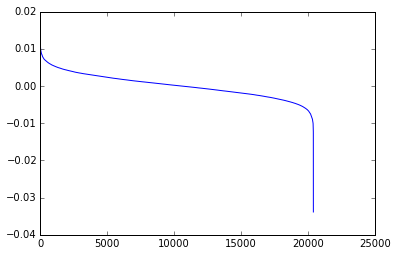

In [378]:
coefs = list(randomarray / 1.)
coefs.sort(reverse=True)
big_coefs = coefs[0:]
plt.plot(big_coefs)

In [379]:
important_vocab = [(key, index) for key, index in CV.vocabulary_.items() if index in dropped_cv_df.columns]

In [380]:
sorted_important_vocab = sorted(important_vocab, key = lambda x: x[1])
coefs_ = randomarray 
zipped_with_coefs = zip(sorted_important_vocab, coefs_)
zipped_with_coefs += zip(dropped_cv_df.columns[-9:], coefs_[-9:])

In [381]:
np.mean(f1scores)

0.64516129032258063

In [382]:
sorted(zipped_with_coefs, key = lambda x: abs(x[1]), reverse=True)

[('AL', -0.033865219331903063),
 ('FFLESCH', -0.025088362172044684),
 ('Against_qs', -0.016611715186429298),
 ((u'to vb prp nn in', 20156), 0.014751800672884013),
 ((u'nn in prp vbp in dt', 10291), 0.014247126907728926),
 ((u'nn in prp vbp in', 10290), 0.013685290507832052),
 ((u'jj nn nnp rb', 7654), 0.013324245402066464),
 ((u'jj jj nns prp', 7279), 0.012819467205830491),
 ((u'vbp prp dt nn in', 23550), -0.012643236918308978),
 ((u'jj jj nns prp vbp', 7280), 0.012623554692819724),
 ((u'cd nns in prp', 1208), -0.012256802405113478),
 ((u'in nn nns vbp', 5476), 0.012185206868034097),
 ((u'nn prp vbz dt jj', 11600), -0.012127566665579483),
 ((u'nn in nn dt nn', 9902), -0.011961061807101814),
 ((u'cc in prp vbd', 222), 0.011947340768395792),
 ((u'cd nn jj', 1131), -0.011703271851131966),
 ((u'vbp vbn cc', 24076), 0.011580028872158728),
 ((u'dt nn in nn vbz', 2231), -0.011500595658915517),
 ((u'nn nnp nnp prp', 11044), 0.011364492098423776),
 ((u'to dt in', 19589), 0.011341733349323735),


In [383]:
df.columns

Index([u'For_text', u'For_POS', u'FL', u'FA', u'FP', u'FS', u'FSC', u'FARI',
       u'FFLESCH', u'Against_text', u'Aga_POS', u'AL', u'AA', u'AP', u'AS',
       u'ASC', u'AARI', u'AFLESCH', u'who_won', u'For_qs', u'Against_qs'],
      dtype='object')

In [416]:
X_nowords = df[['FL', 'FA', 'FP', 'FS', 'FSC', 'FARI', \
       'FFLESCH','AL','AA', 'AP', 'AS', \
       'ASC', 'AARI', 'AFLESCH','For_qs', 'Against_qs']]

for x in range(100): 
    XNW_train, XNW_test, ynw_train, ynw_test = train_test_split(X_nowords, df['who_won'])
    lgnw = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
    fittedlgnw = lgnw.fit(XNW_train, ynw_train)
    predicted_lgnw = fittedlgnw.predict(XNW_test)
    f1_score(predicted_lgnw, ynw_test)

In [418]:
text = "This is what I want to do."
lesk?

#TFIDF VECTORIZATION

In [24]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_vectors = tfidf.fit_transform(all_text)

vector_differences = tfidf_vectors[0:107] - tfidf_vectors[107:214]

df['Vector_differences'] = list(vector_differences.todense())

In [25]:
X_train, X_test, y_train, y_test = train_test_split(vector_differences, target)
lg = LogisticRegressionCV(penalty = 'l1', solver='liblinear')
fittedlg = lg.fit(X_train, y_train)
predicted_lg = fittedlg.predict(X_test)
f1_score(predicted_lg, y_test)

0.31999999999999995

In [599]:
sum_of_aga_motion_tfidf_winners = sum(df[df['who_won']==0]['Vector_differences'])
aga_wins_avg_tfidf = sum_of_aga_motion_tfidf_winners/len(df[df['who_won']==0])

sum_of_for_motion_tfidf_winners = sum(df[df['who_won']==1]['Vector_differences'])
for_wins_avg_tfidf = sum_of_for_motion_tfidf_winners/len(df[df['who_won']==1])

cosim_to_aga_wins_avg_tfidf = linear_kernel(aga_wins_avg_tfidf, vector_differences)
cosim_to_for_wins_avg_tfidf = linear_kernel(for_wins_avg_tfidf, vector_differences)

df['cosim_to_for_wins'] = cosim_to_for_wins_avg_tfidf.reshape(107, 1)
df['cosim_to_aga_wins'] = cosim_to_aga_wins_avg_tfidf.reshape(107, 1)

In [9]:
similarity_to_for_the_motion = [] 
similarity_to_aga_the_motion = []

for x in range(107): 
    new_df = df[df.index != x]
    
    sum_aga = sum(new_df[new_df['who_won'] == 0]['Vector_differences'])
    aga_avg = sum_aga/len(new_df[new_df['who_won'] == 0])
    
    sum_for = sum(new_df[new_df['who_won'] == 1]['Vector_differences'])
    for_avg = sum_for/len(new_df[new_df['who_won'] == 1])
    
    similarity_to_for_the_motion.append(cosine_similarity(df['Vector_differences'][x], for_avg)[0][0])
    similarity_to_aga_the_motion.append(cosine_similarity(df['Vector_differences'][x], aga_avg)[0][0])

In [10]:
df['similarity_to_for_motion_avg'] = similarity_to_for_the_motion
df['similarity_to_aga_motion_avg'] = similarity_to_aga_the_motion

In [43]:
df.columns

Index([u'For_text', u'FL', u'FA', u'FP', u'FS', u'Against_text', u'AL', u'AA',
       u'AP', u'AS', u'who_won', u'Vector_differences',
       u'similarity_to_for_motion_avg', u'similarity_to_aga_motion_avg'],
      dtype='object')

In [73]:
X = df[['FP', 'FS', 'AP', 'AS']]

In [74]:
#X = df.drop(['For_text', 'Against_text', 'who_won', 'Vector_differences'], axis=1)

In [75]:
y = df['who_won']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [141]:
lr1 = LogisticRegression()

In [142]:
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [143]:
lr1.score(X_test, y_test)

0.48148148148148145

In [144]:
y_hat = lr1.predict(X_test)

In [145]:
f1_score(y_test, y_hat)

0.46153846153846151

In [82]:
rf1 = RandomForestClassifier(n_estimators = 10000)
fittedrf = rf1.fit(X_train, y_train)
y_hat_rf = fittedrf.predict(X_test)
f1_score(y_test, y_hat_rf)

In [85]:
f1_score(y_test, y_hat_rf)

0.48275862068965519

In [38]:
jancsy_x = df[df['who_won']==0]['similarity_to_for_motion_avg']
jancsy_y = df[df['who_won']==0]['similarity_to_aga_motion_avg']

jancsy_x2 = df[df['who_won']==1]['similarity_to_for_motion_avg']
jancsy_y2 = df[df['who_won']==1]['similarity_to_aga_motion_avg']

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline 

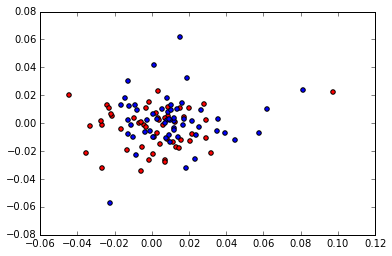

In [40]:
plt.figure(101) 
plt.scatter(jancsy_x, jancsy_y, c='red')
plt.scatter(jancsy_x2, jancsy_y2)

1